In [0]:
import torch
import numpy as np
from torchvision import datasets,transforms
import matplotlib.pyplot as plt

In [0]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = datasets.FashionMNIST('F_MNIST_data/',download=True,train=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,64,shuffle=True)

testset = datasets.FashionMNIST('F_MNIST_data/',download=True,train=False,transform=transform)
testloader = torch.utils.data.DataLoader(testset,64,shuffle=True)

In [0]:
images,labels = next(iter(trainloader))

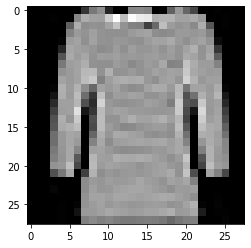

In [4]:
plt.imshow(images[10].numpy().squeeze(),cmap='gray')

In [0]:
from torch import nn
from torch import optim
import torch.nn.functional as F

In [0]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784,256)
    #self.drop1 = nn.Dropout(p=0.3)
    self.fc2 = nn.Linear(256,128)
    self.fc3 = nn.Linear(128,64)
    self.fc4 = nn.Linear(64,10)

  def forward(self,x):
    x = self.fc1(x)
    x = F.relu(x)
    #x = self.drop1(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.fc3(x)
    x = F.relu(x)
    x = self.fc4(x)

    return x

In [0]:
model = Network()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.003)

In [18]:
model

Network(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [0]:
epochs = 5
steps=0
for e in range(epochs):
      running_loss = 0
      for images,labels in iter(trainloader):
        steps+=1
        images.resize_(images.size(0),784)
        optimizer.zero_grad()

        pred = model.forward(images)
        loss = criterion(pred,labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if (steps%50==0):
          print("Epoch:{}".format(e))
          print("Loss: {:.4f}".format(running_loss/40))
          running_loss = 0



In [0]:
testloader = torch.utils.data.DataLoader(testset,shuffle=True)

True Label 3 ..... Predicted Label 3


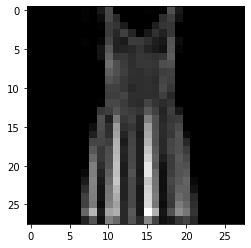

In [27]:
image,label = next(iter(testloader))
image.resize_(1,784)
with torch.no_grad():
    logits = model.forward(image)

preds = F.softmax(logits,dim=1)
prediction = preds.numpy().argmax()
plt.imshow(image.resize_(28,28),cmap='gray')
print("True Label {} ..... Predicted Label {}".format(int(label),prediction))

In [28]:
wrong = 0
total = 0
for image,label in iter(testloader):
  total += 1
  image.resize_(1,784)
  with torch.no_grad():
    logits = model.forward(image)

  preds = F.softmax(logits,dim=1)
  prediction = preds.numpy().argmax()
  if (prediction != int(label)):
    wrong +=1
acc = ((total-wrong)/total)
print(wrong)
print(total)
print("Accuracy is {:.3f}".format(acc))

1141
10000
Accuracy is 0.886


In [0]:
trainloader_copy = torch.utils.data.DataLoader(trainset,shuffle=True)

In [25]:
wrong = 0
total = 0
for image,label in iter(trainloader_copy):
  total += 1
  image.resize_(1,784)
  with torch.no_grad():
    logits = model.forward(image)

  preds = F.softmax(logits,dim=1)
  prediction = preds.numpy().argmax()
  if (prediction != int(label)):
    wrong +=1
acc = ((total-wrong)/total)
print(wrong)
print(total)
print("Accuracy is {:.3f}".format(acc))

4354
60000
Accuracy is 0.927
